# Task 3 of spark foundation

## We have to perform a Explotary Data Analysis on given data for Buisness purpose

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Plot a graph for states

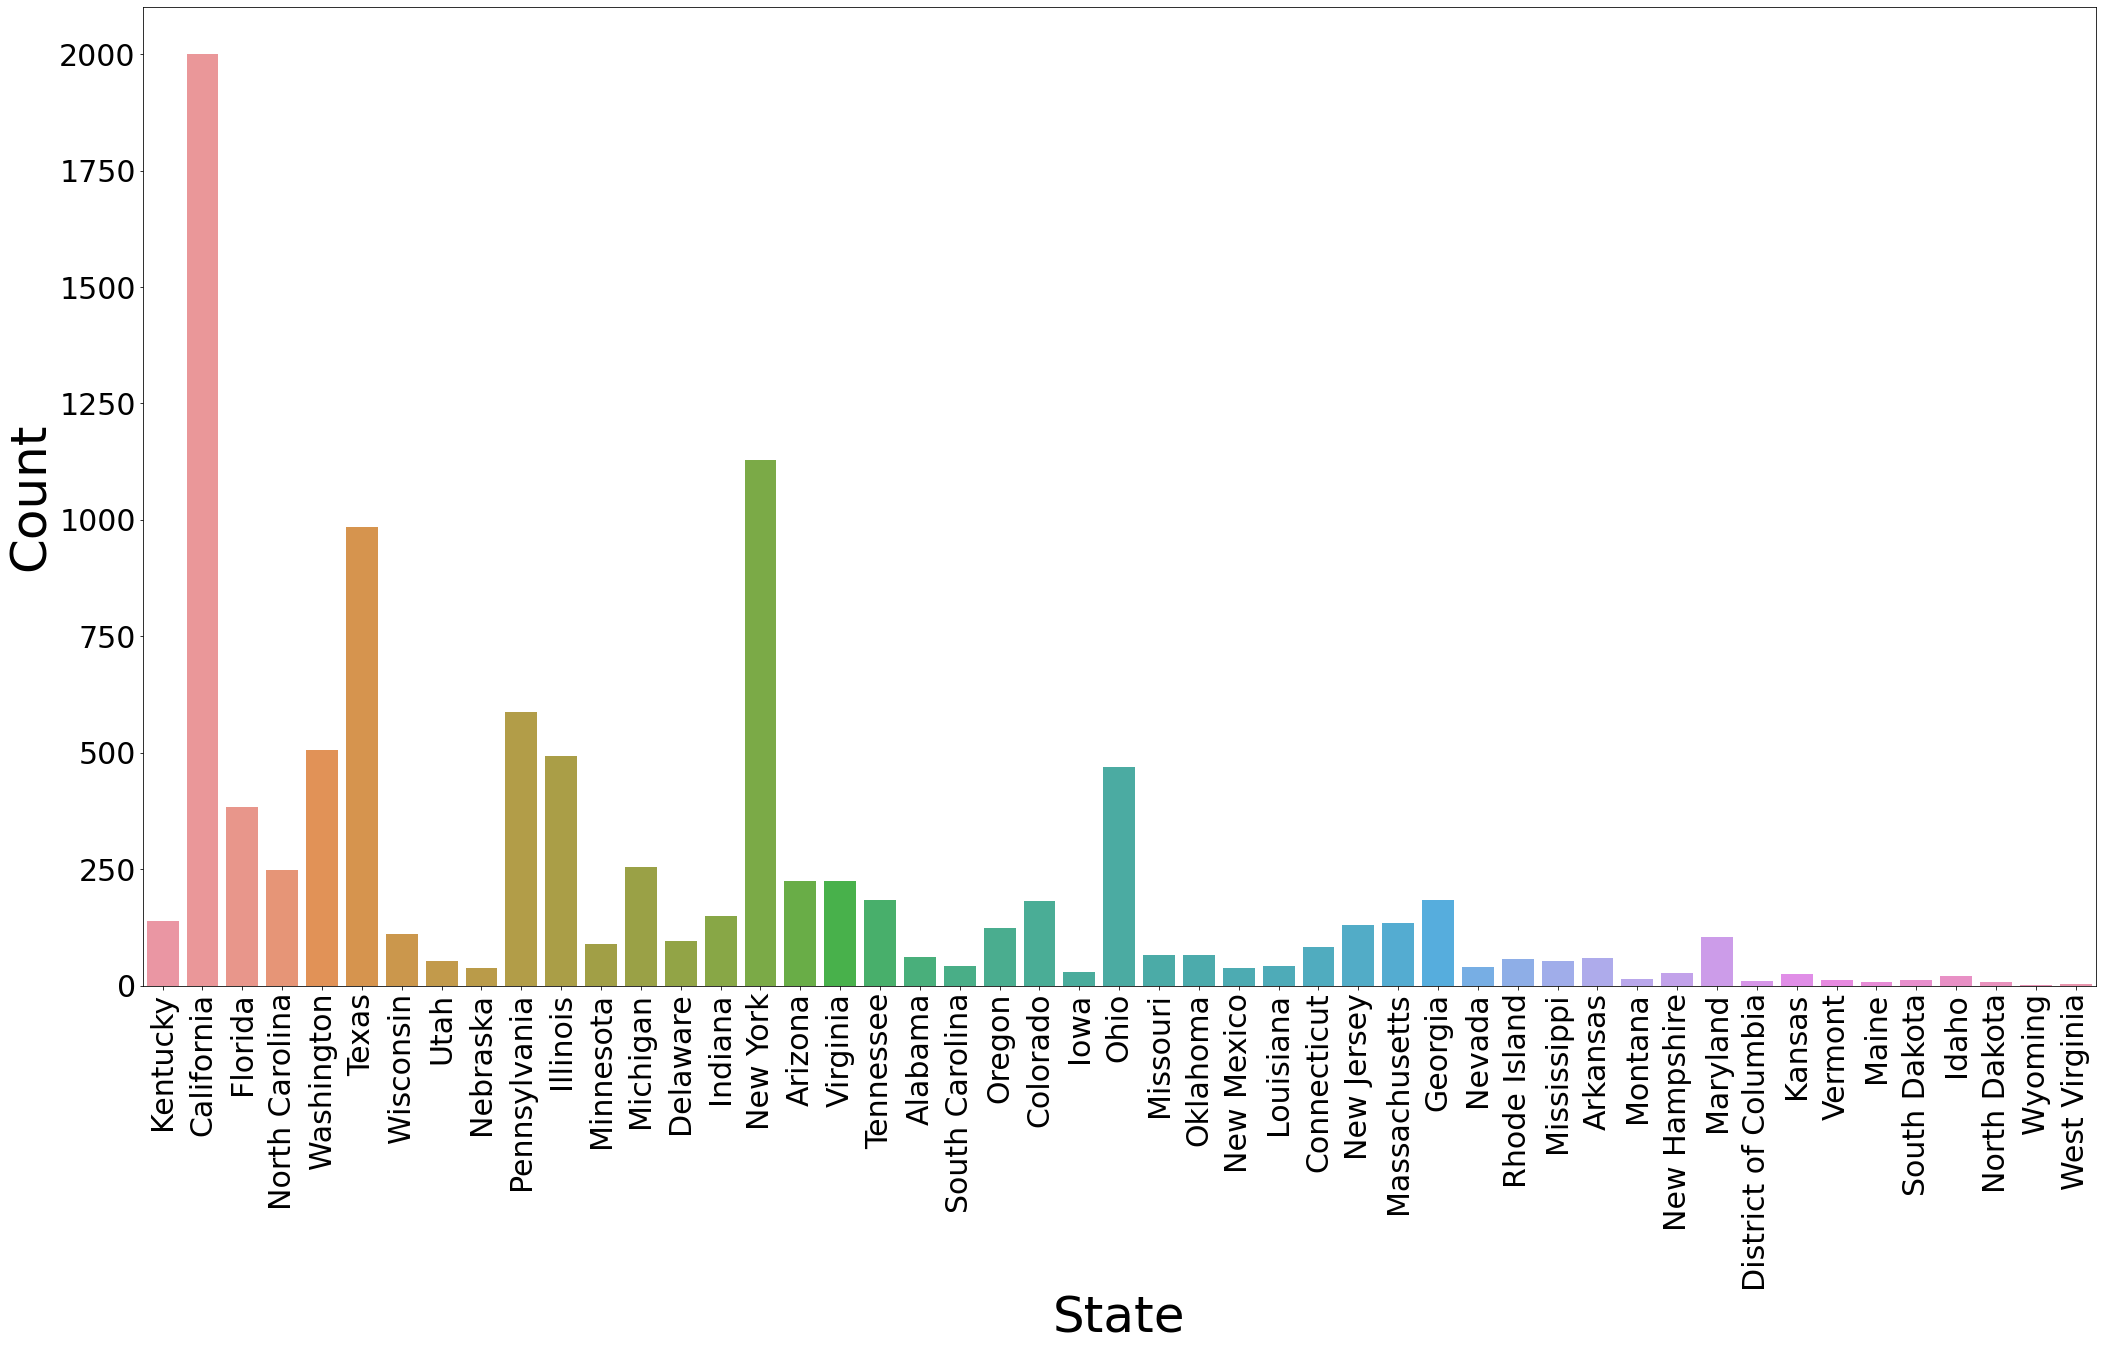

In [6]:
plt.figure(figsize=(35,18))
a = sns.countplot(x = "State", data = df)
a.set_xticklabels(a.get_xticklabels(), rotation = 90)
plt.xlabel('State', fontsize=50) 
plt.ylabel('Count', fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()  

## Mean shale per states

In [7]:
state = df.groupby(['State'])['Sales'].mean().reset_index()

In [8]:
state

,State,Sales
0,Alabama,319.846557
1,Arizona,157.508933
2,Arkansas,194.635500
3,California,228.729451
4,Colorado,176.418231
5,Connecticut,163.223866
6,Delaware,285.948635
7,District of Columbia,286.502000
8,Florida,233.612815
9,Georgia,266.825217


<function matplotlib.pyplot.show(close=None, block=None)>

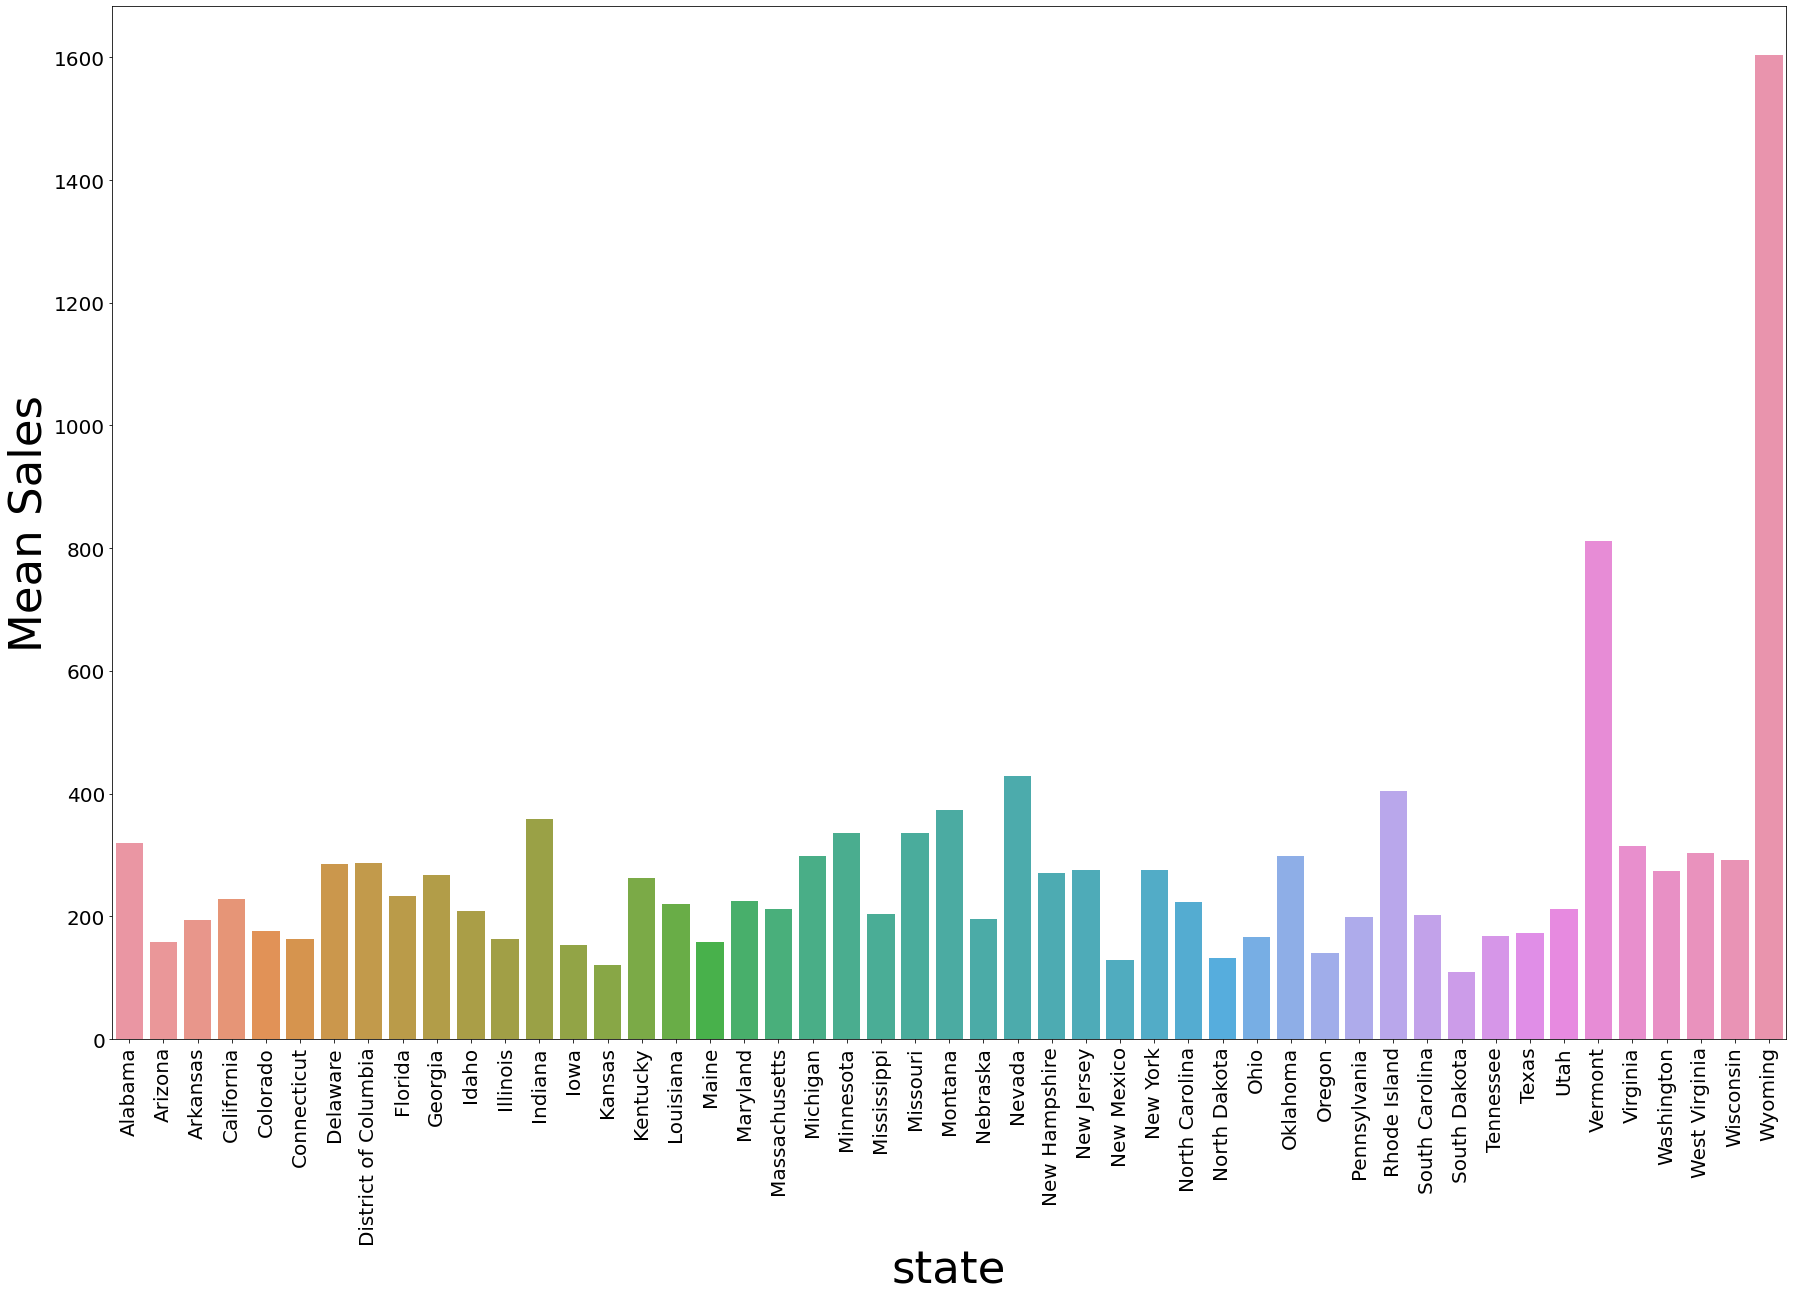

In [9]:
plt.figure(figsize = (30,19))
b = sns.barplot(x = "State", y = "Sales", data = state)
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.xlabel("state",fontsize = 45)
plt.ylabel("Mean Sales",fontsize = 45)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show

### We will plot a graph to see which state make maximum priofit

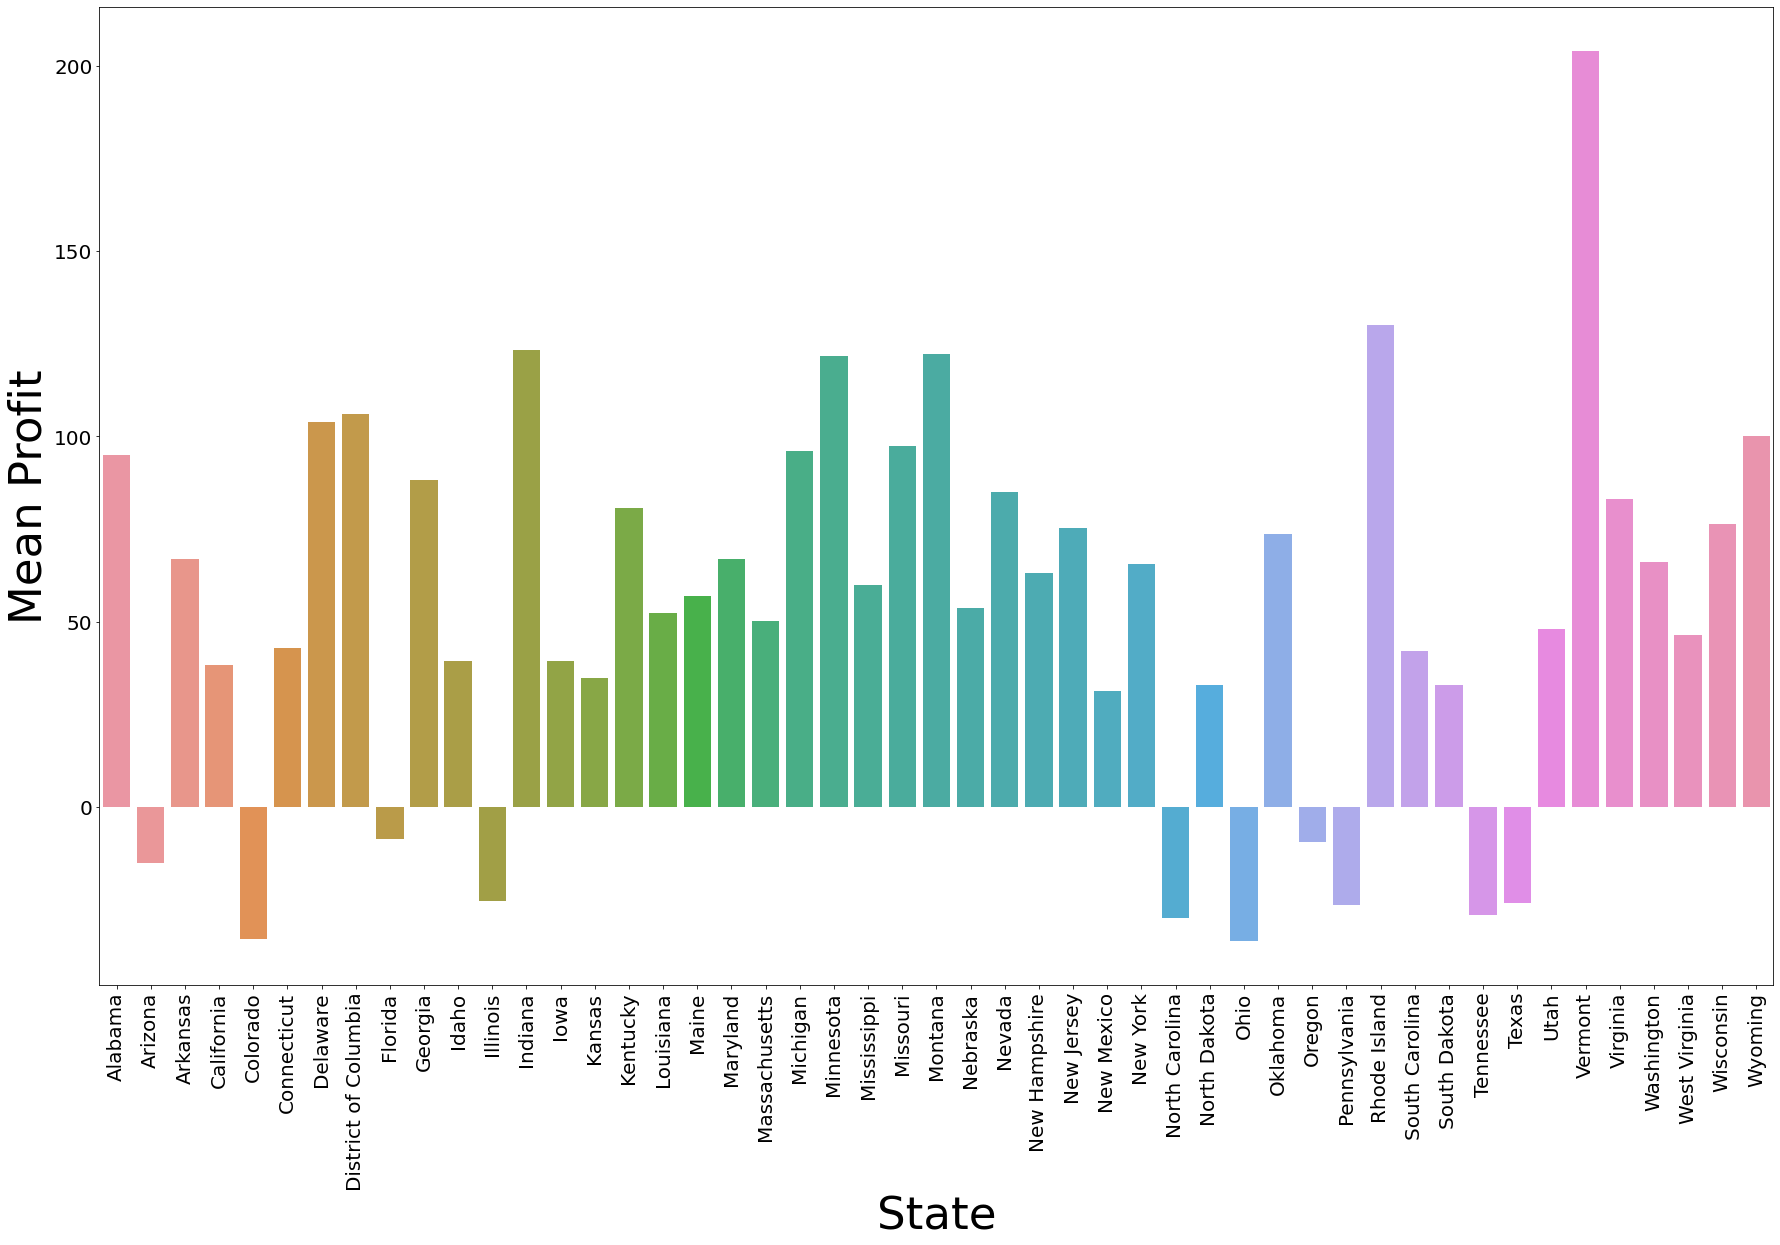

In [10]:
plt.figure(figsize = (30,18))
State = df.groupby(['State'])['Profit'].mean().reset_index()
c = sns.barplot("State","Profit",data = State)
c.set_xticklabels(c.get_xticklabels(), rotation = 90)
plt.xlabel("State",fontsize = 45)
plt.ylabel("Mean Profit",fontsize = 45)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

### We plot a graph to visulaise which catagory of produch have max sale in which Region

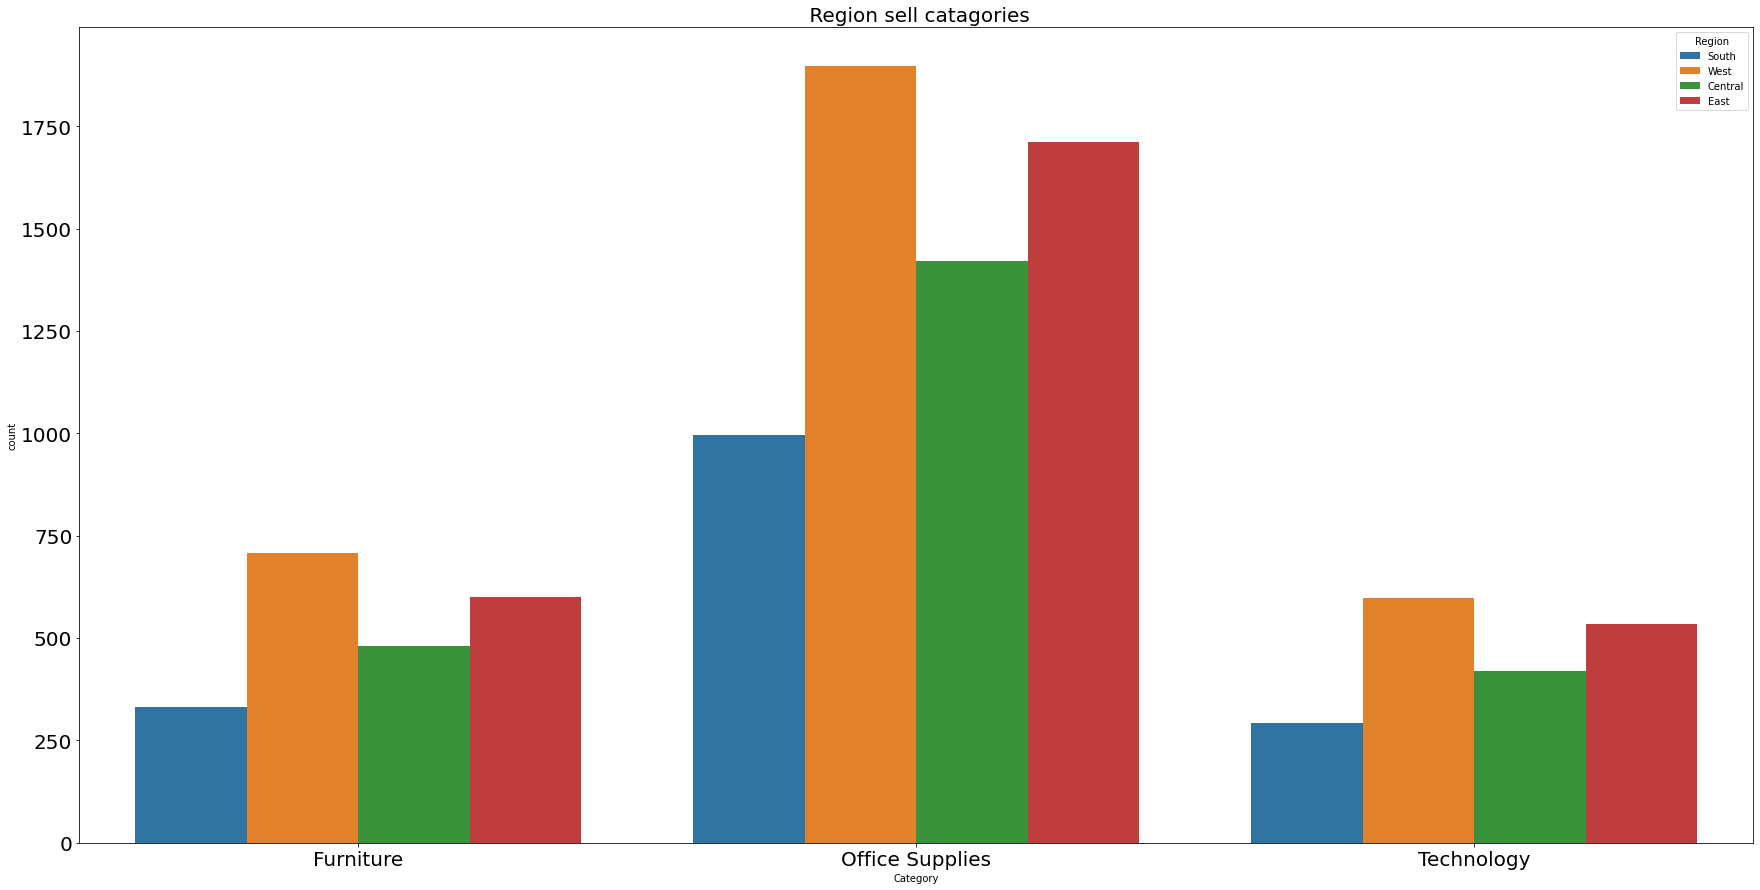

In [11]:
plt.figure(figsize=(30,15))
sns.countplot( x = df["Category"], hue = df["Region"])
plt.title(" Region sell catagories",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Now we will plot graphs Region wise

## We will count the Region

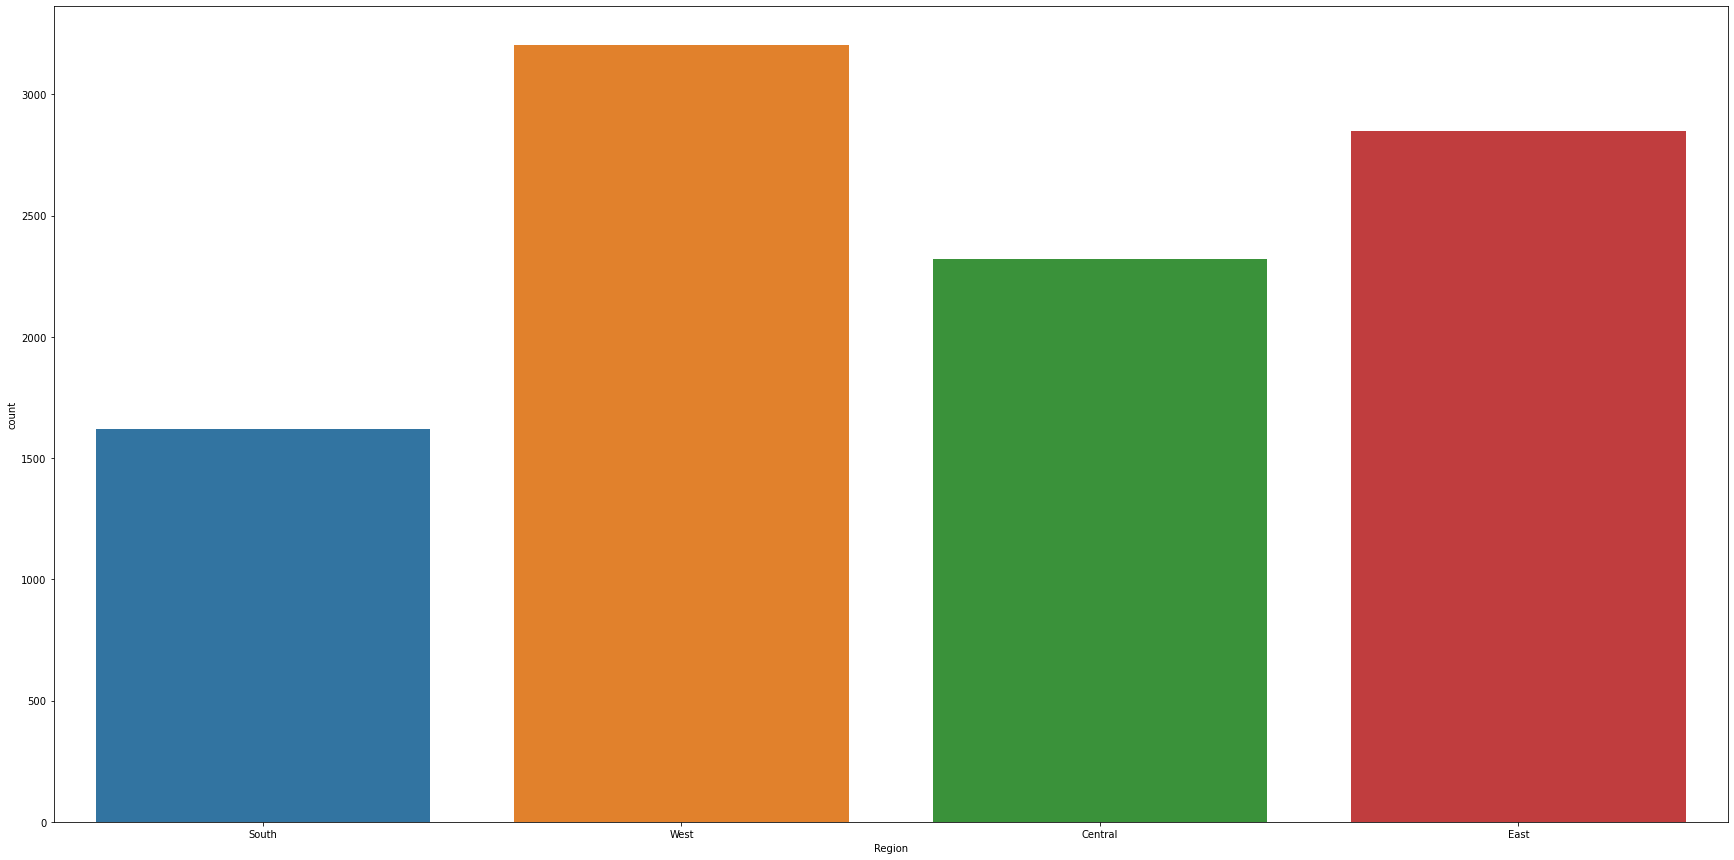

In [12]:
plt.figure(figsize=(30,15))
sd = sns.countplot(x = "Region", data= df)

### Plot a graph to see which region provide discount the most

In [13]:
Region = df.groupby(["Region"])['Discount'].mean().reset_index()
Region

,Region,Discount
0,Central,0.240353
1,East,0.145365
2,South,0.147253
3,West,0.109335


<function matplotlib.pyplot.show(close=None, block=None)>

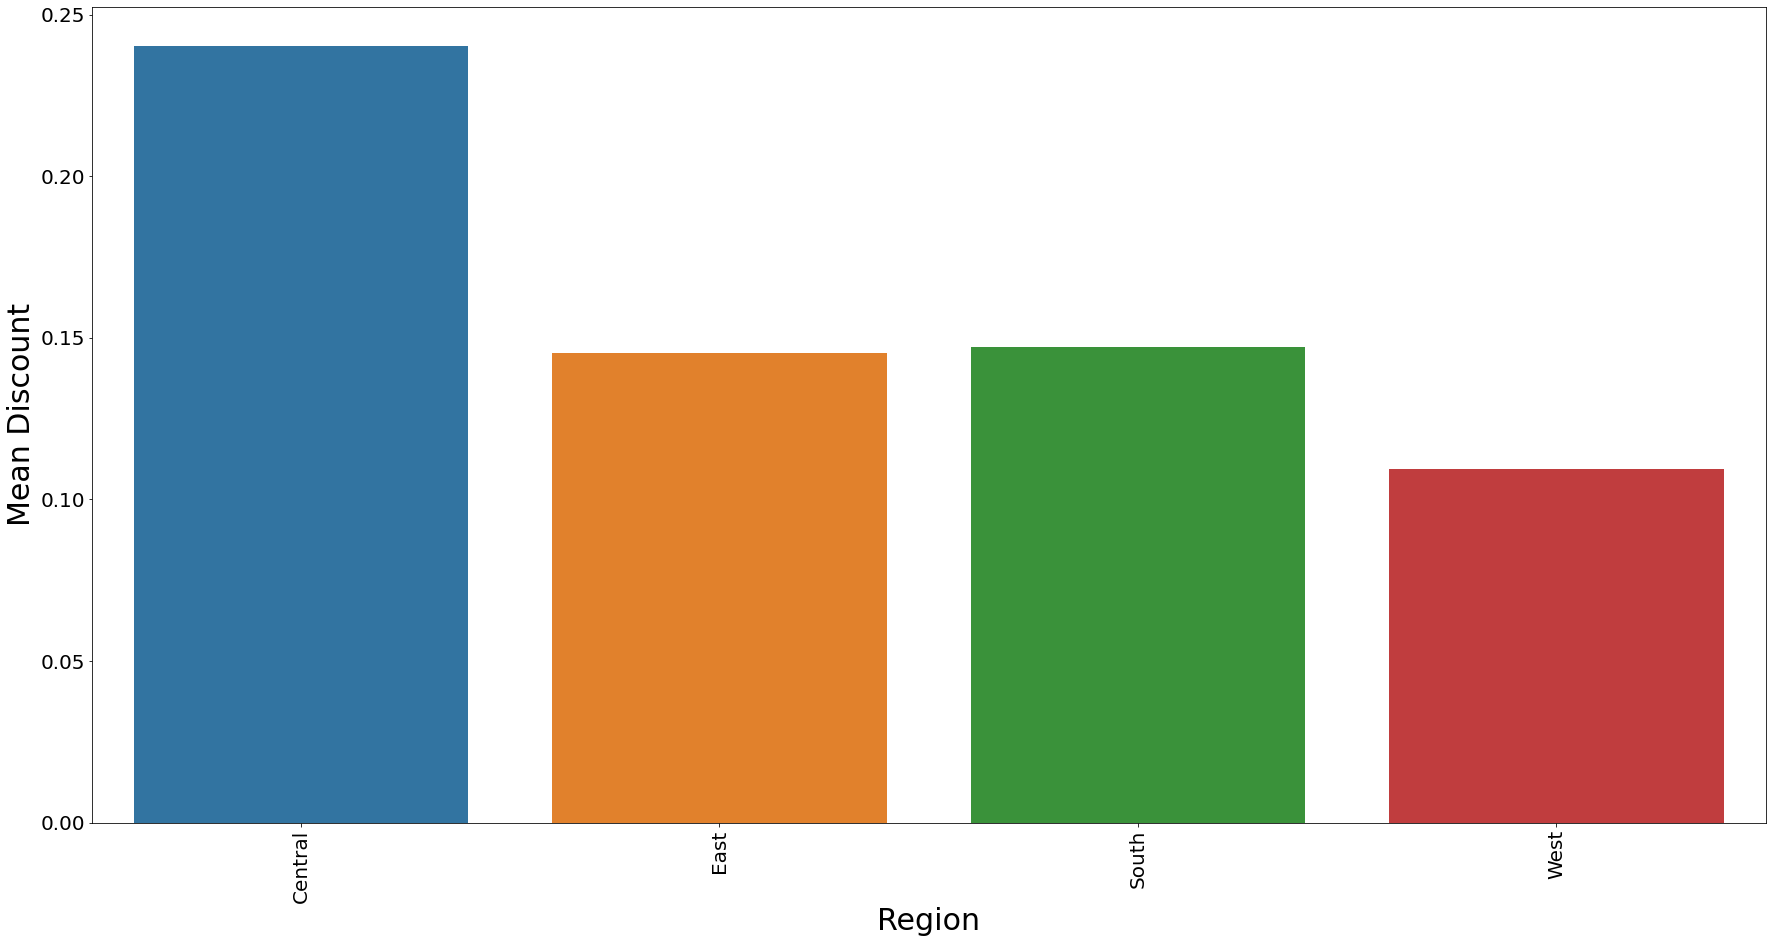

In [14]:
plt.figure(figsize = (30,15))
Rp = sns.barplot("Region","Discount",data= Region)
Rp.set_xticklabels(Rp.get_xticklabels(),rotation = 90)
plt.xlabel("Region",fontsize = 30)
plt.ylabel("Mean Discount",fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show

### Plot a graph to see which region gives most of the sale

In [15]:
Region = df.groupby(["Region"])['Sales'].mean().reset_index()
Region

,Region,Sales
0,Central,215.772661
1,East,238.336110
2,South,241.803645
3,West,226.493233


<function matplotlib.pyplot.show(close=None, block=None)>

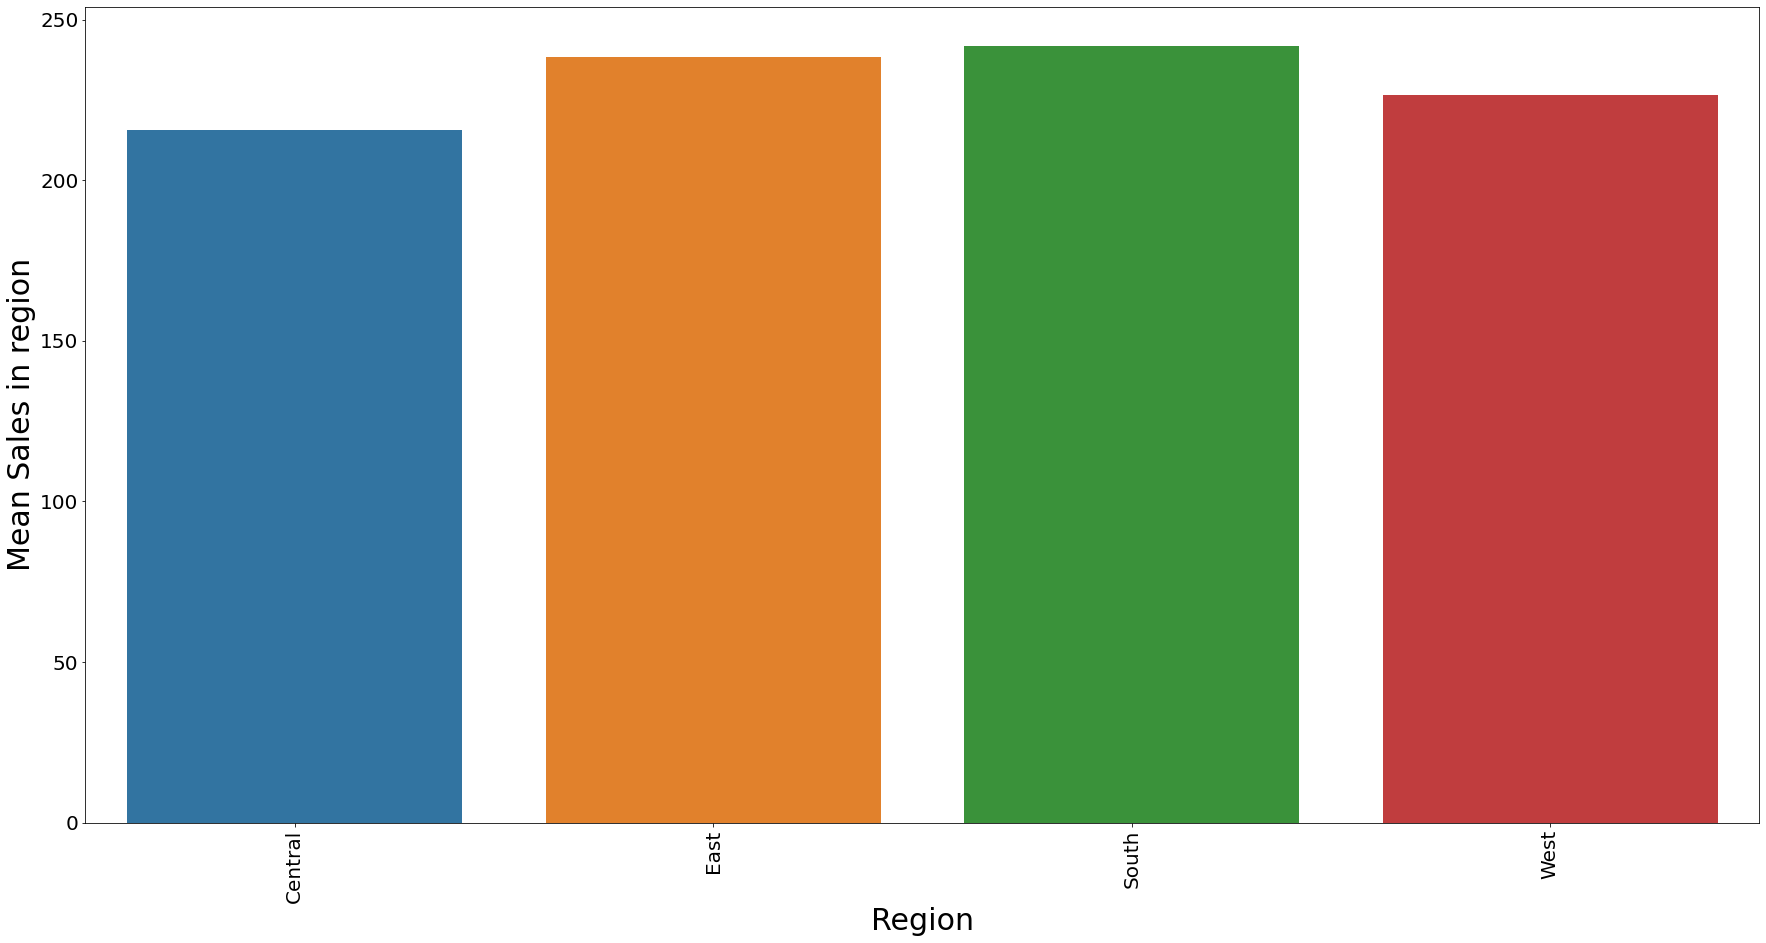

In [16]:
plt.figure(figsize = (30,15))
Rp = sns.barplot("Region","Sales",data= Region)
Rp.set_xticklabels(Rp.get_xticklabels(),rotation = 90)
plt.xlabel("Region",fontsize = 30)
plt.ylabel("Mean Sales in region",fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show

### Plot a graph to see which region gives most of the Profit

In [17]:
Region = df.groupby(["Region"])['Profit'].mean().reset_index()
Region

,Region,Profit
0,Central,17.092709
1,East,32.135808
2,South,28.857673
3,West,33.849032


<function matplotlib.pyplot.show(close=None, block=None)>

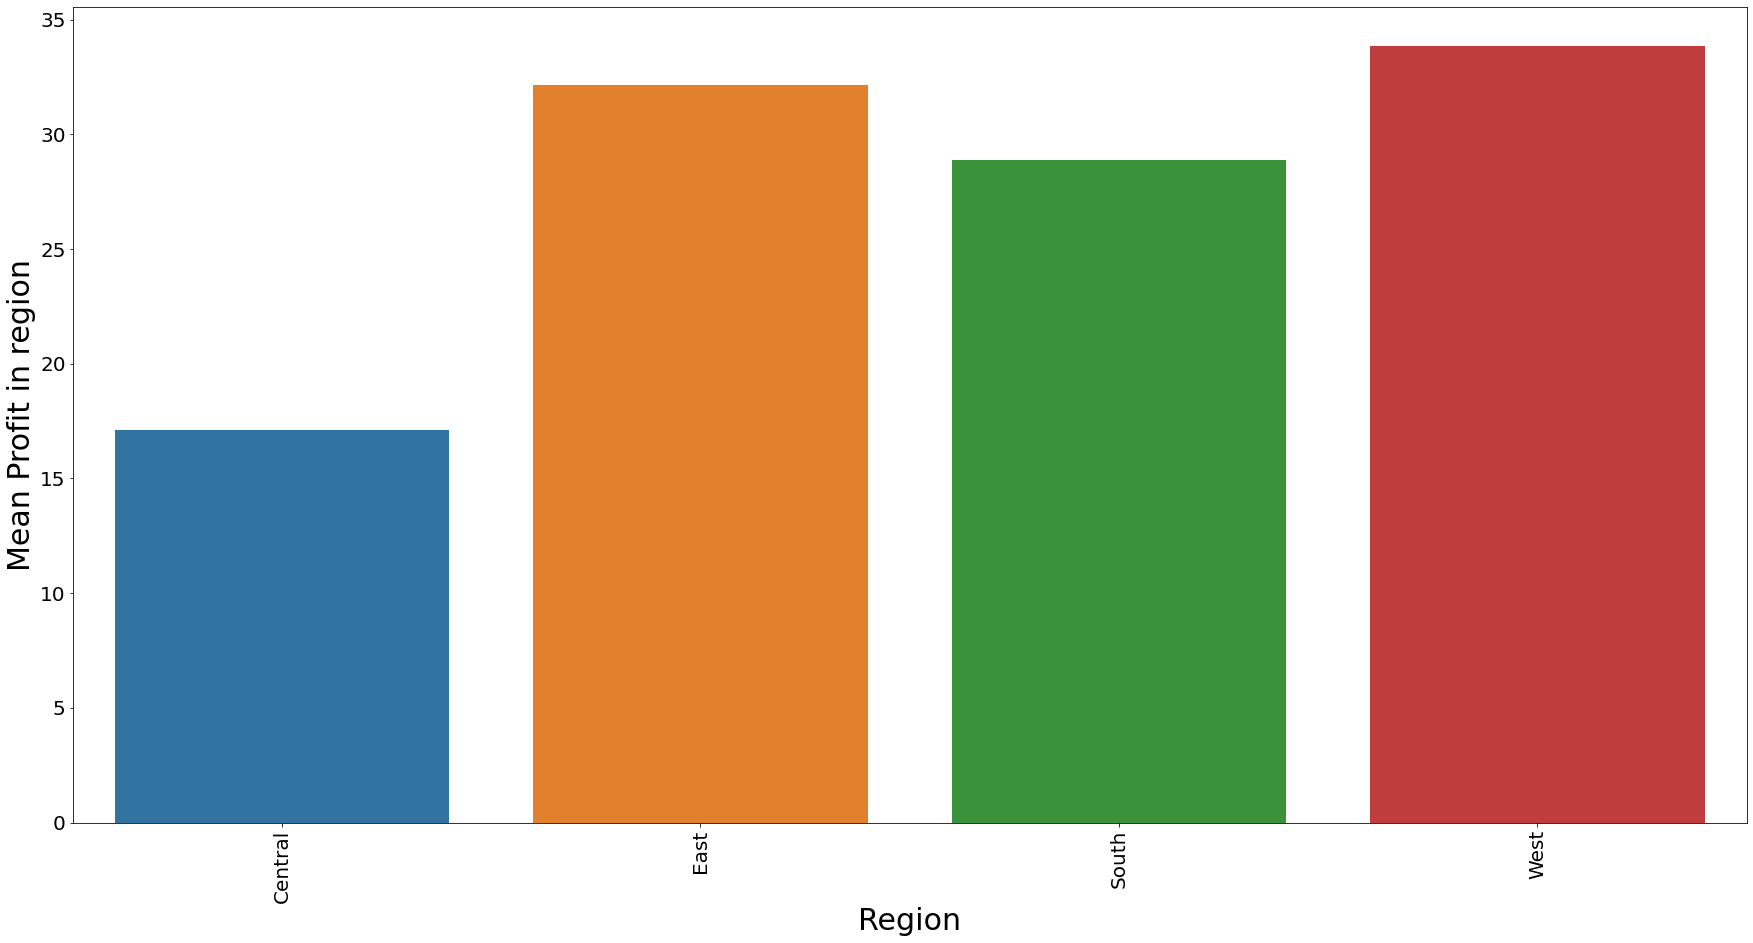

In [18]:
plt.figure(figsize = (30,15))
Rp = sns.barplot("Region","Profit",data= Region)
Rp.set_xticklabels(Rp.get_xticklabels(),rotation = 90)
plt.xlabel("Region",fontsize = 30)
plt.ylabel("Mean Profit in region",fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show

# We will find now catagory wise

### We  will count the catagory

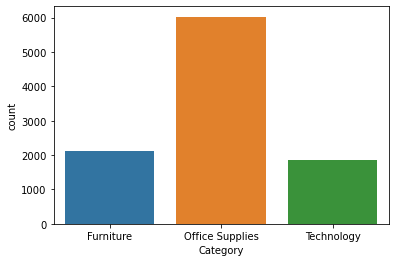

In [19]:
Cp = sns.countplot(x = "Category", data = df)

### Plot a graph to see which Catagory gives most of the Profit

<function matplotlib.pyplot.show(close=None, block=None)>

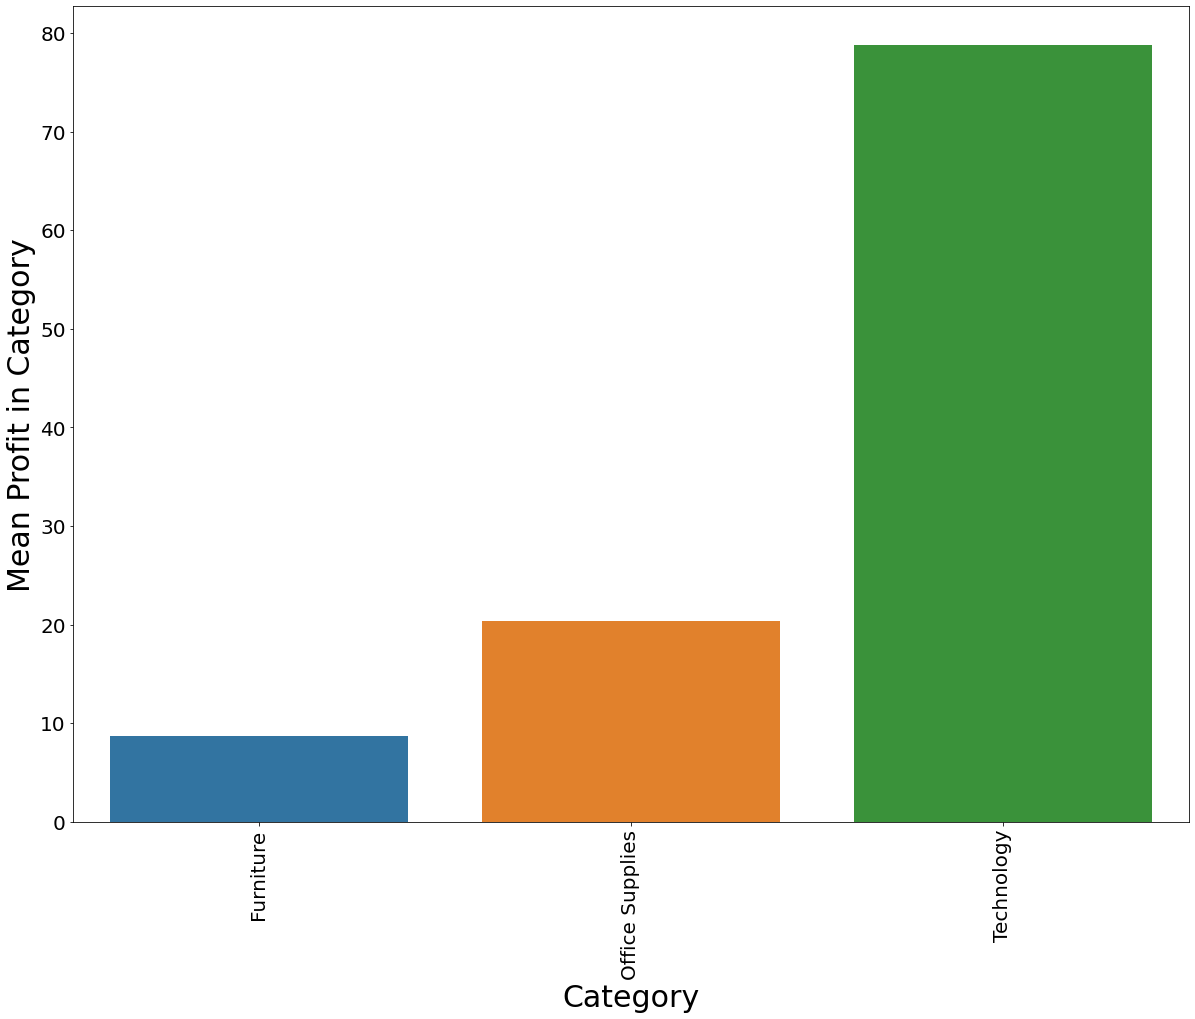

In [20]:
Cata = df.groupby(["Category"])['Profit'].mean().reset_index()
plt.figure(figsize = (20,15))
Rp = sns.barplot("Category","Profit",data= Cata)
Rp.set_xticklabels(Rp.get_xticklabels(),rotation = 90)
plt.xlabel("Category",fontsize = 30)
plt.ylabel("Mean Profit in Category",fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show

### Plot a graph to see which Catagory gives most of the Sale

<function matplotlib.pyplot.show(close=None, block=None)>

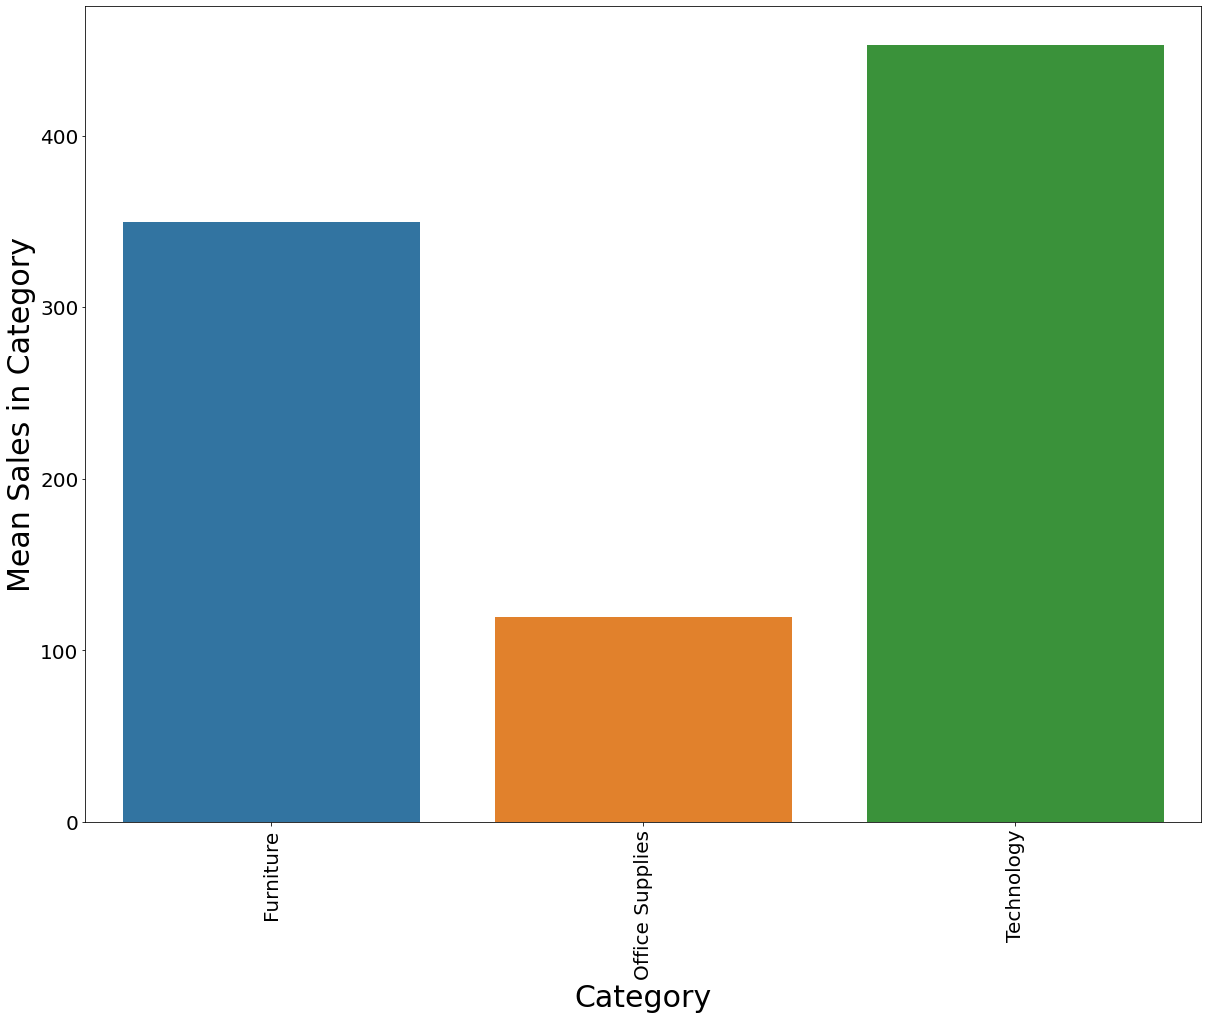

In [21]:
Cata = df.groupby(["Category"])['Sales'].mean().reset_index()
plt.figure(figsize = (20,15))
Rp = sns.barplot("Category","Sales",data= Cata)
Rp.set_xticklabels(Rp.get_xticklabels(),rotation = 90)
plt.xlabel("Category",fontsize = 30)
plt.ylabel("Mean Sales in Category",fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show

### Plot a graph to see which Catagory gives most of the Discount

<function matplotlib.pyplot.show(close=None, block=None)>

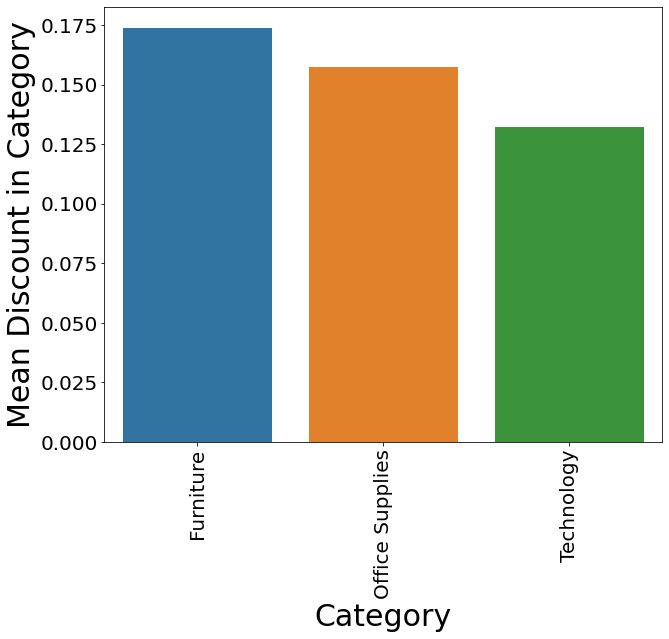

In [22]:
Cata = df.groupby(["Category"])['Discount'].mean().reset_index()
plt.figure(figsize = (10,8))
Rp = sns.barplot("Category","Discount",data= Cata)
Rp.set_xticklabels(Rp.get_xticklabels(),rotation = 90)
plt.xlabel("Category",fontsize = 30)
plt.ylabel("Mean Discount in Category",fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show

# We will find now Sub_catagory wise

### We  will count the catagory

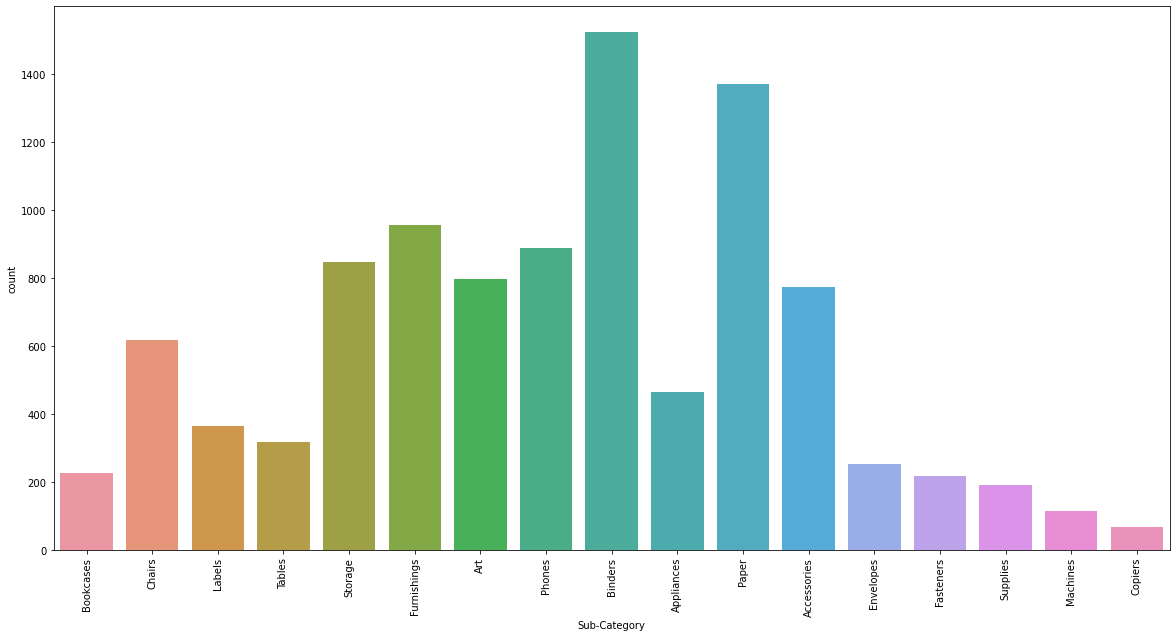

In [23]:
plt.figure(figsize=(20,10))
Sp=sns.countplot(x="Sub-Category", data=df)
Sp.set_xticklabels(Sp.get_xticklabels(),rotation=90)
plt.show()

### Plot a graph to see which Sub-Catagory gives most of the Sale

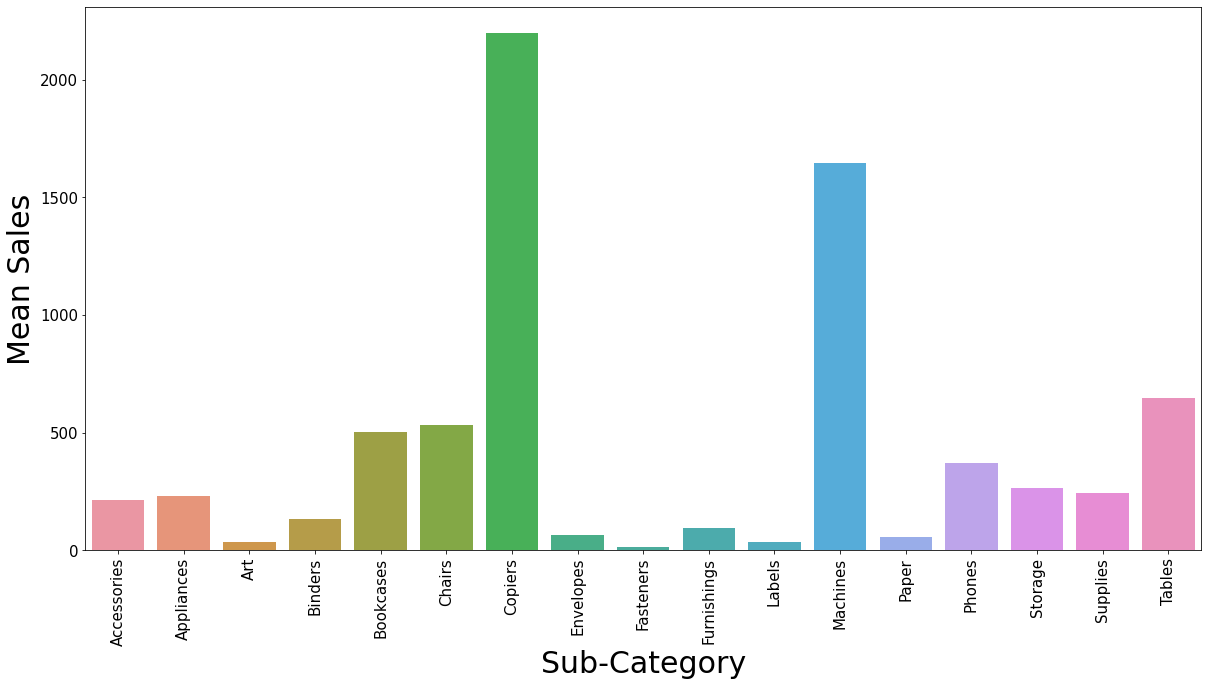

In [24]:
plt.figure(figsize=(20,10))
sub = df.groupby(['Sub-Category'])['Sales'].mean().reset_index()
Sp=sns.barplot(x = 'Sub-Category', y='Sales', data=sub)
Sp.set_xticklabels(Sp.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=30) 
plt.ylabel('Mean Sales', fontsize=30)
plt.show()

### Plot a graph to see which Sub-Catagory gives most of the Profit

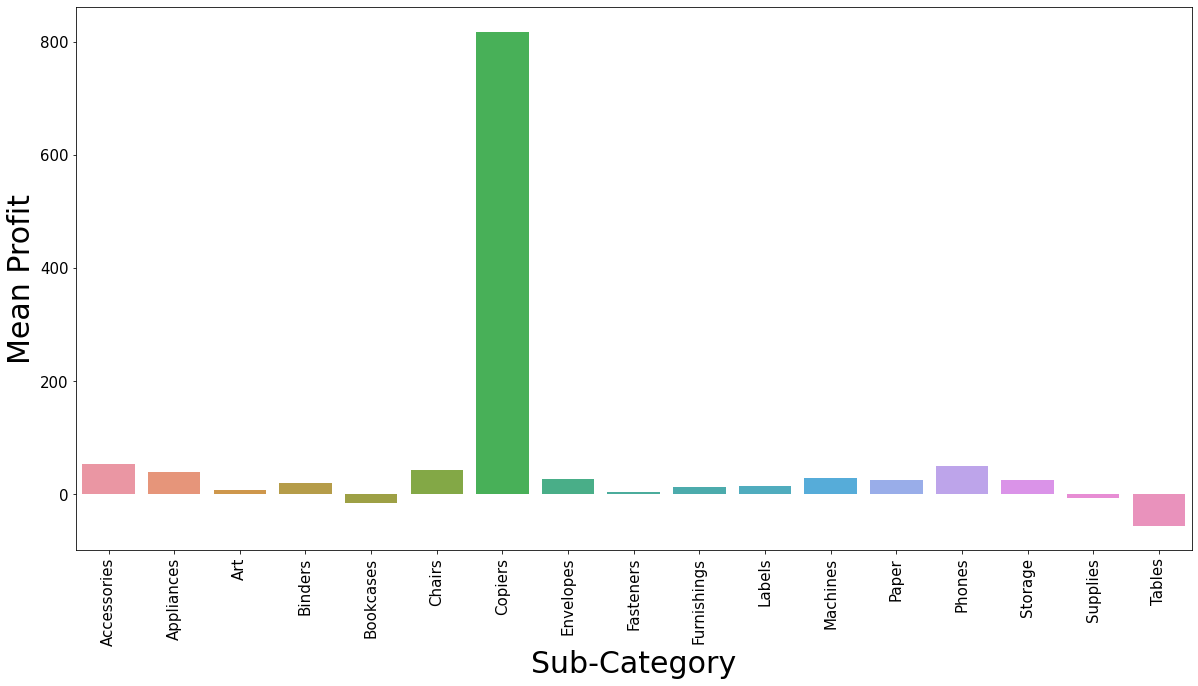

In [25]:
plt.figure(figsize=(20,10))
sub = df.groupby(['Sub-Category'])['Profit'].mean().reset_index()
Sp=sns.barplot(x = 'Sub-Category', y='Profit', data=sub)
Sp.set_xticklabels(Sp.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=30) 
plt.ylabel('Mean Profit', fontsize=30)
plt.show()

### Plot a graph to see which Sub-Catagory gives most of the Sale

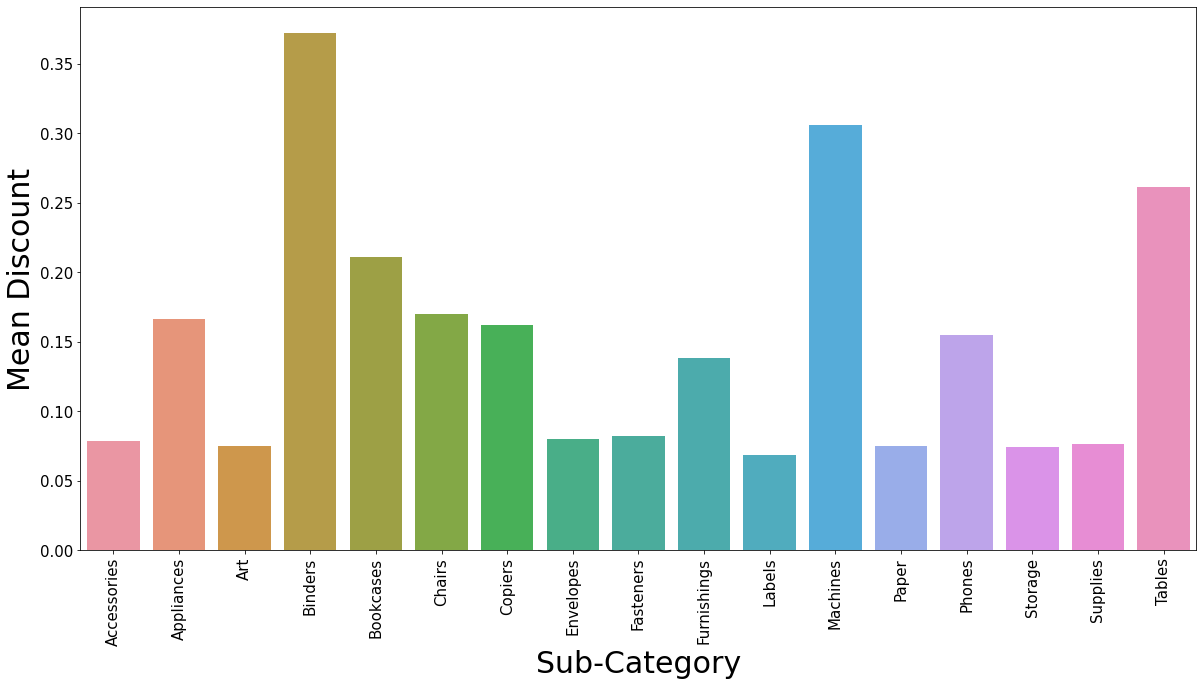

In [26]:
plt.figure(figsize=(20,10))
sub = df.groupby(['Sub-Category'])['Discount'].mean().reset_index()
Sp=sns.barplot(x = 'Sub-Category', y='Discount', data=sub)
Sp.set_xticklabels(Sp.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=30) 
plt.ylabel('Mean Discount', fontsize=30)
plt.show()

# We will find now SHIP MODE wise

### We  will count the Ship mode

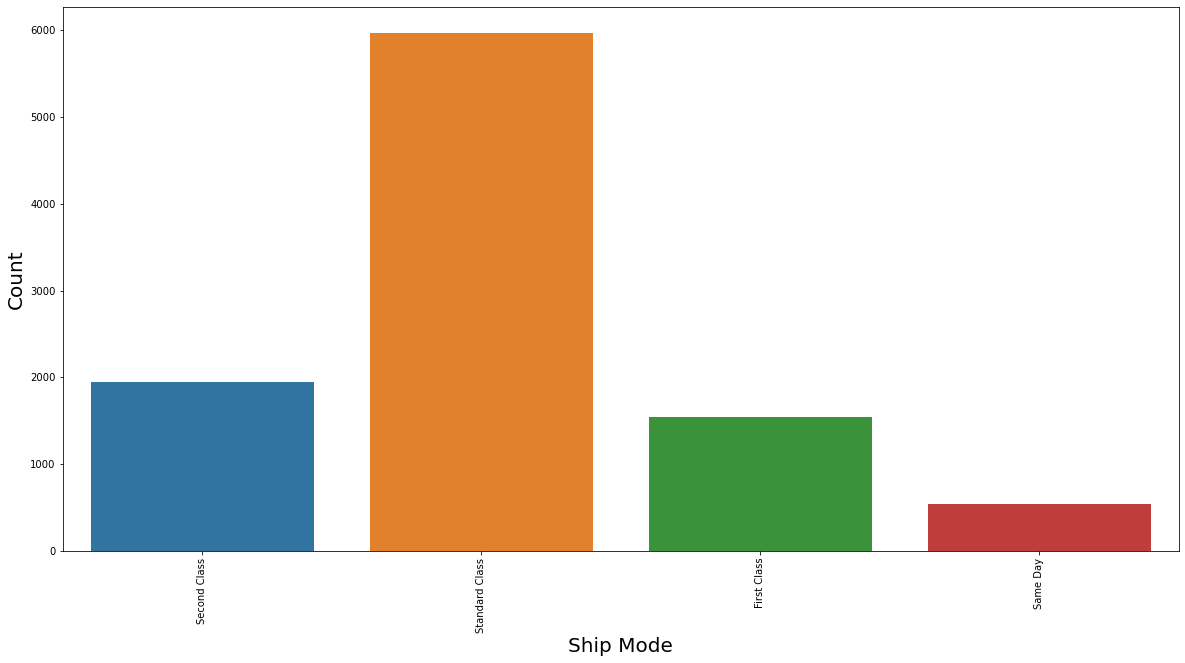

In [27]:
plt.figure(figsize=(20,10))
Shp=sns.countplot(x="Ship Mode", data=df)
Shp.set_xticklabels(Shp.get_xticklabels(),rotation=90)
plt.xlabel('Ship Mode', fontsize=20) 
plt.ylabel('Count', fontsize=20)
plt.show()  

### Plot a graph to see which Ship Mode gives most of the Discount

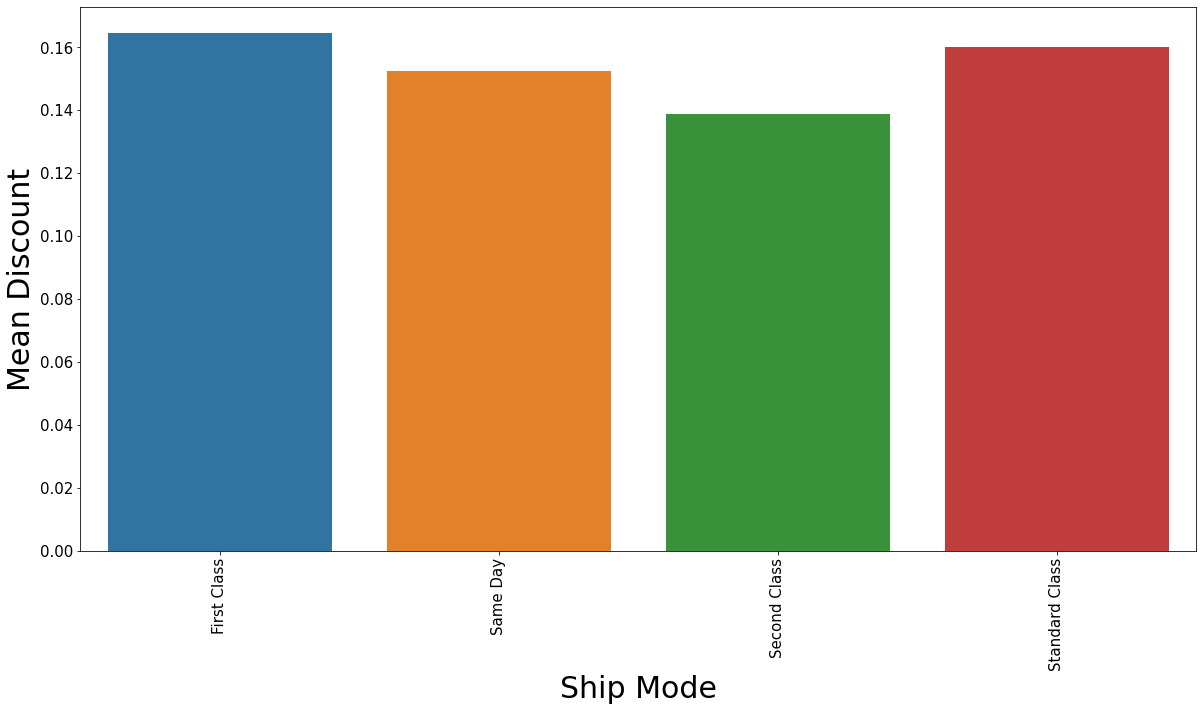

In [28]:
plt.figure(figsize=(20,10))
ship = df.groupby(['Ship Mode'])['Discount'].mean().reset_index()
Shp =sns.barplot('Ship Mode','Discount', data=ship)
Shp.set_xticklabels(Shp.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Ship Mode', fontsize=30) 
plt.ylabel('Mean Discount', fontsize=30)
plt.show()

### Plot a graph to see which Ship Mode gives most of the Sale

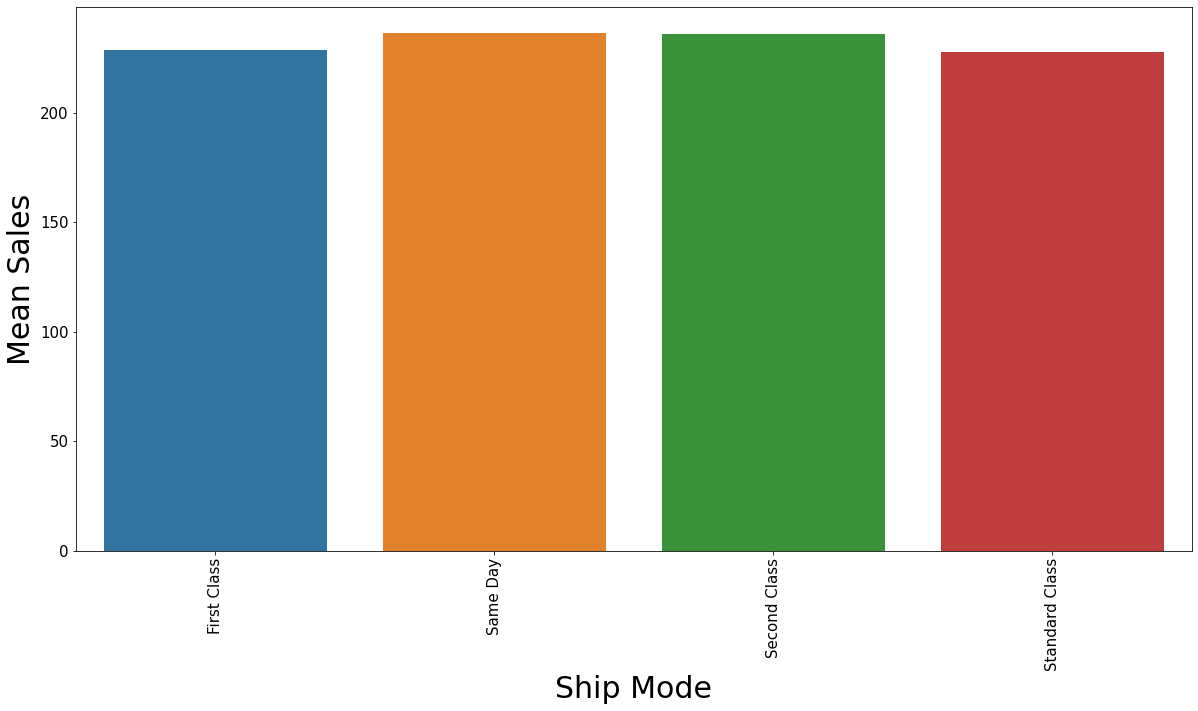

In [29]:
plt.figure(figsize=(20,10))
ship = df.groupby(['Ship Mode'])['Sales'].mean().reset_index()
Shp=sns.barplot('Ship Mode','Sales', data=ship)
Shp.set_xticklabels(Shp.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Ship Mode', fontsize=30) 
plt.ylabel('Mean Sales', fontsize=30)
plt.show()

### Plot a graph to see which Ship Mode gives most of the Profit

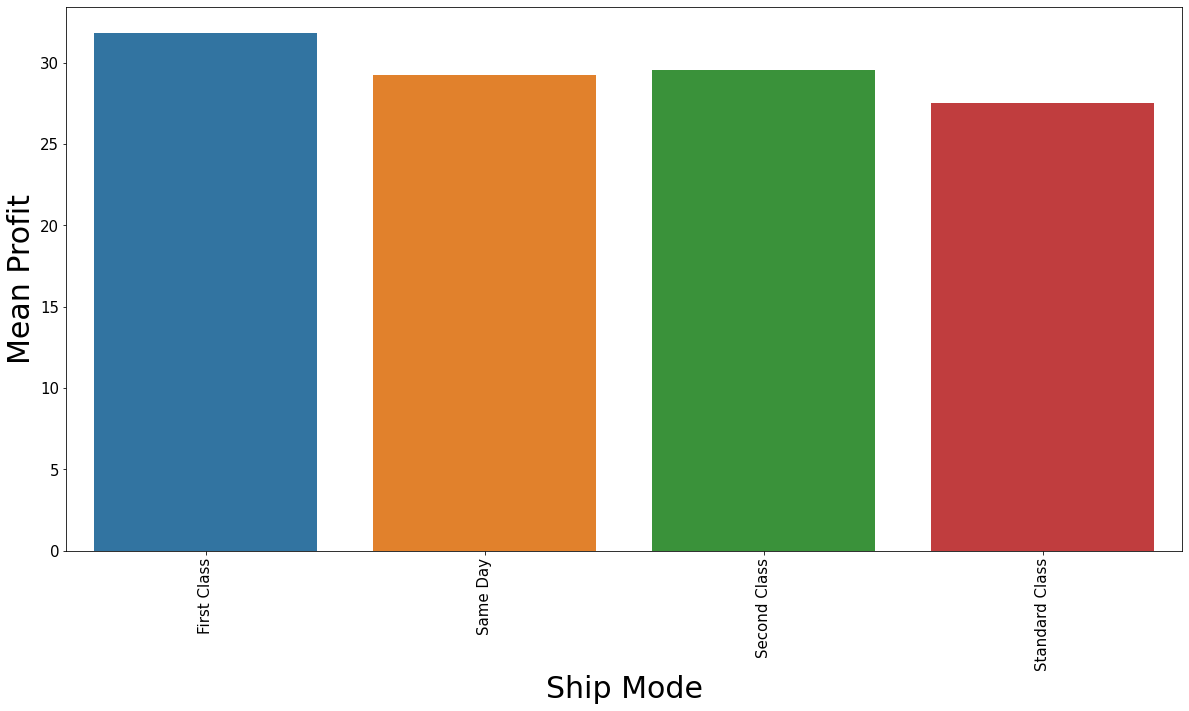

In [30]:
plt.figure(figsize=(20,10))
ship = df.groupby(['Ship Mode'])['Profit'].mean().reset_index()
Shp=sns.barplot('Ship Mode','Profit', data=ship)
Shp.set_xticklabels(Shp.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Ship Mode', fontsize=30) 
plt.ylabel('Mean Profit', fontsize=30)
plt.show()

## It is the meat map which shows the data co relation

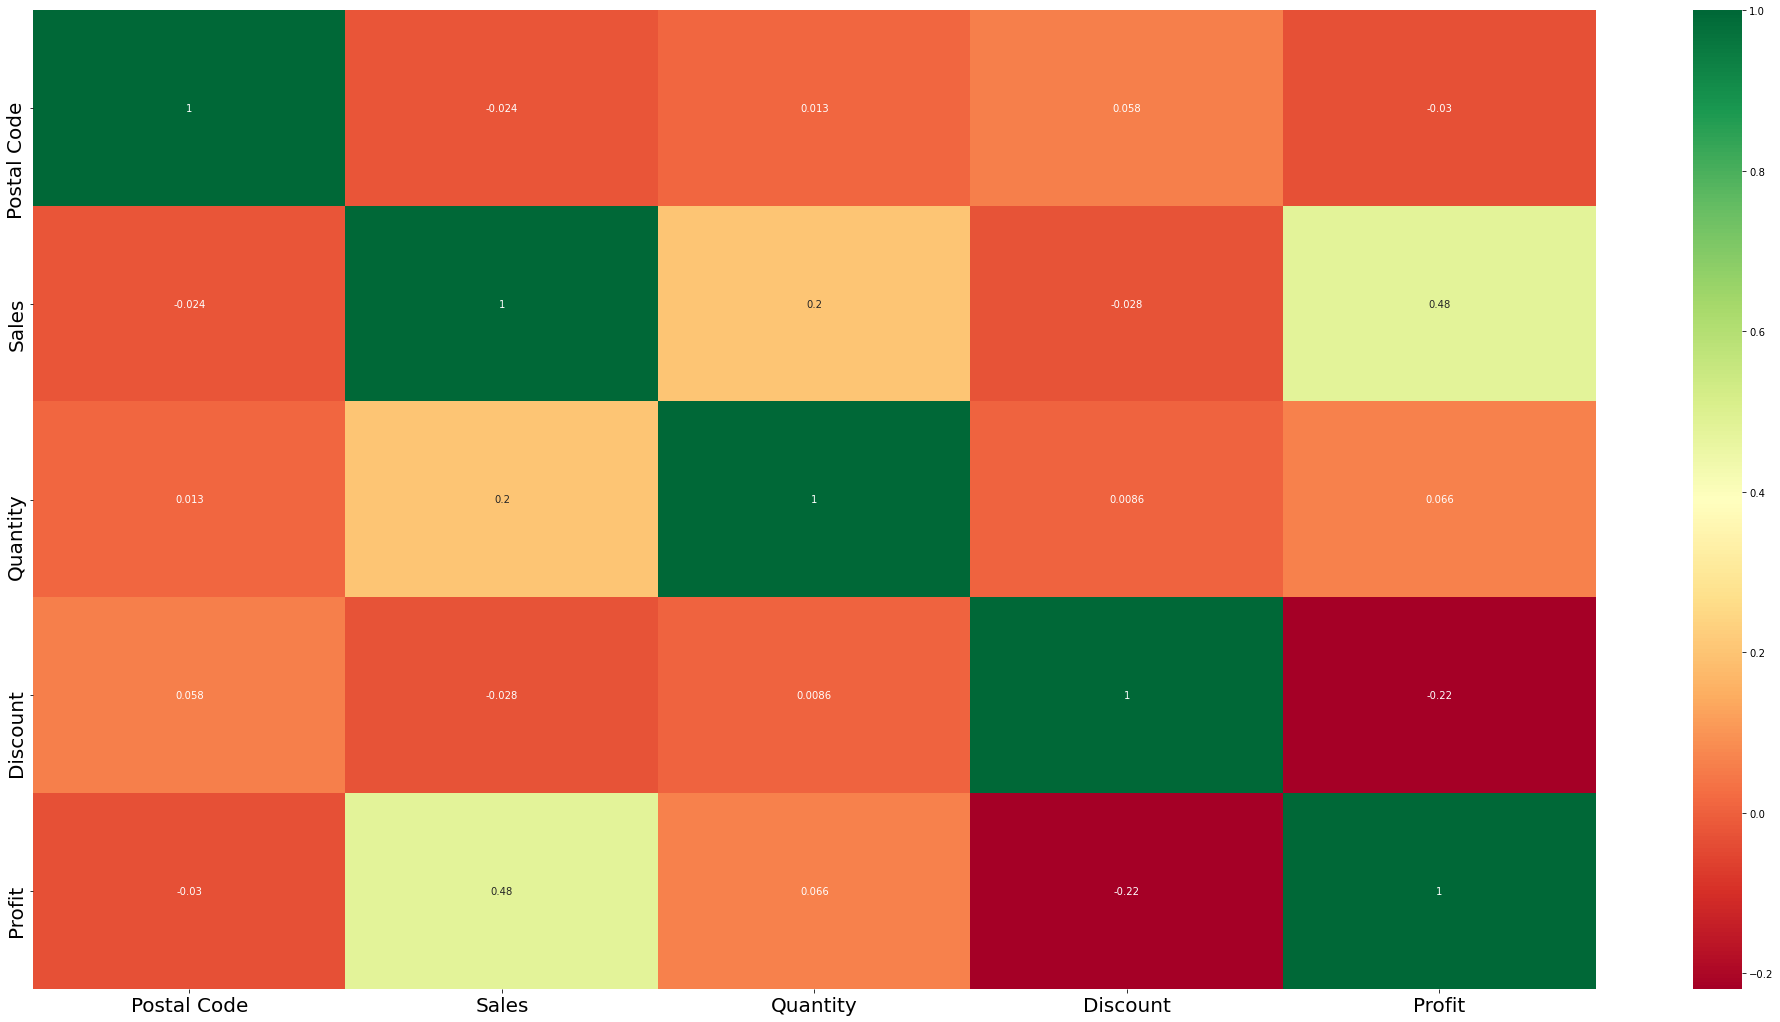

In [31]:
plt.figure(figsize=(35,18))
corelation = df.corr()
sns.heatmap(corelation,annot=True,cmap='RdYlGn');
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

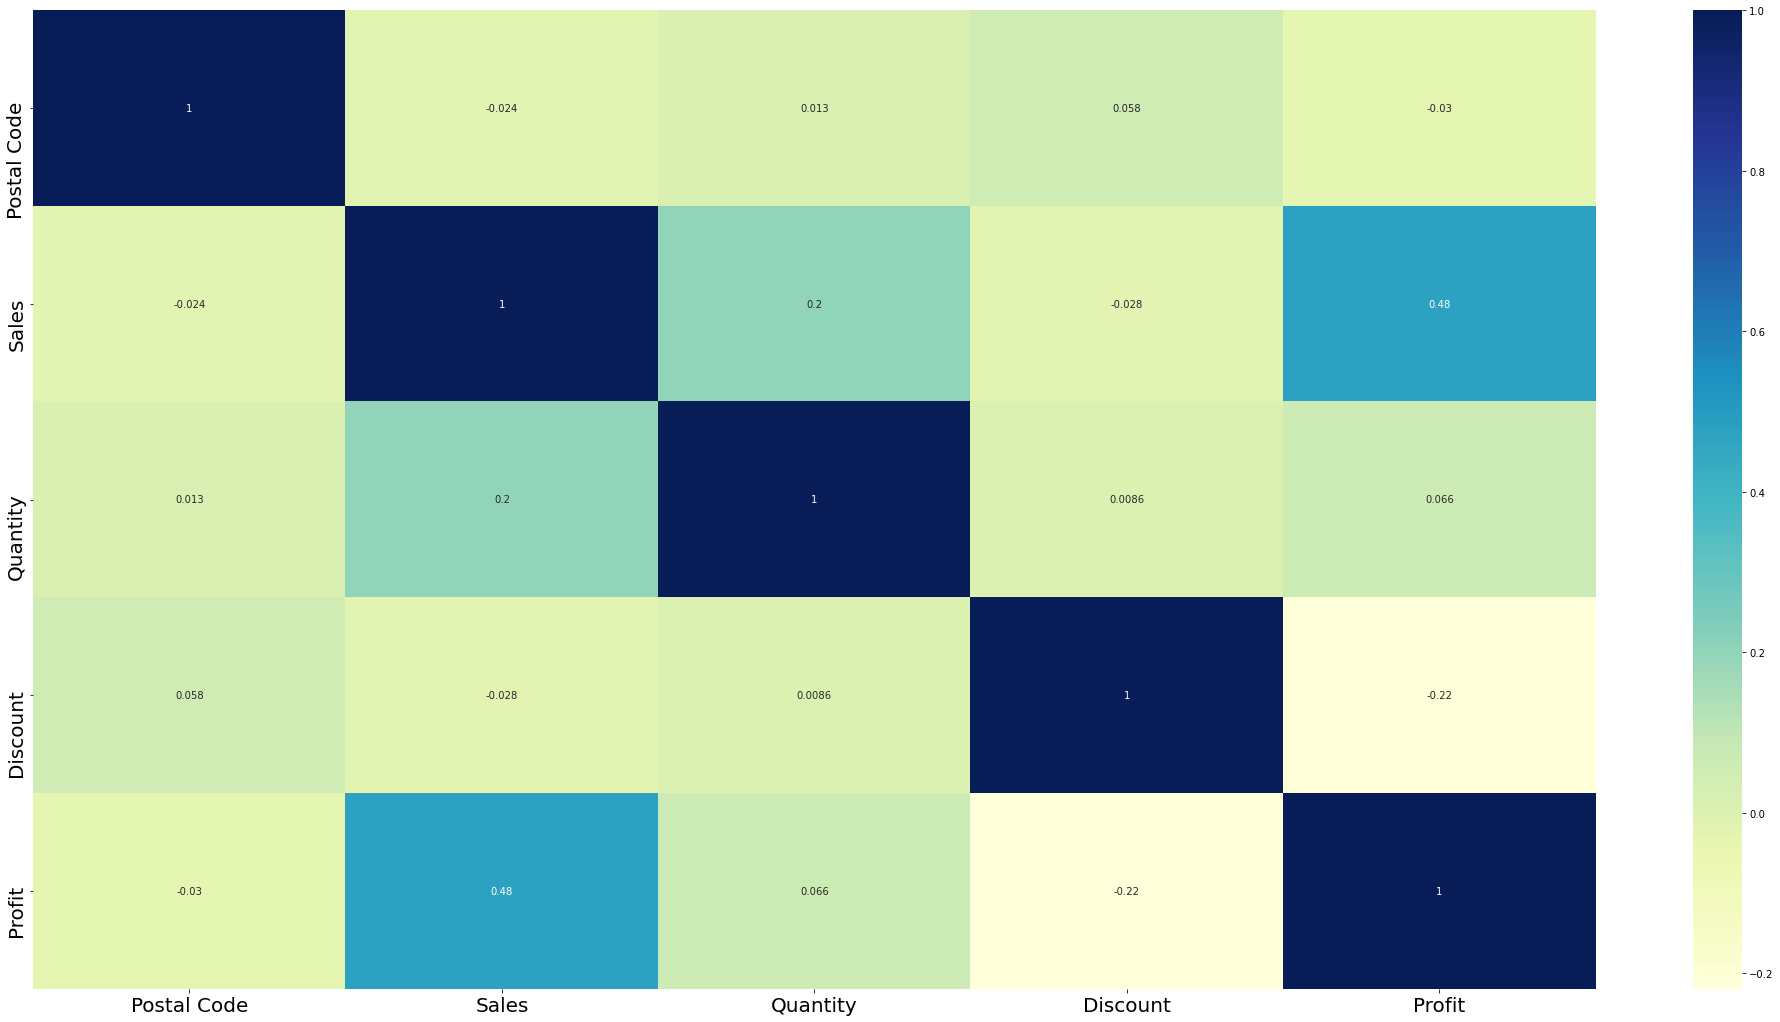

In [32]:
plt.figure(figsize=(35,18))
corelation = df.corr()
sns.heatmap(corelation,annot=True,cmap="YlGnBu");
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Conclusion

### Wyoming State has higest sale but no the higest profit. On other hand Vermont State has higest profit with 2nd higest sale.
### States like Arizona, Colorado, Florda, Illinois, North Caroline, Ohio, Oregon, Pennsylvania, Tennessee and Texas are on losses

###  Technology Category has highes sales and maximum profit ,need to concentate on Office Supplies category to increase sales

### From West Region there are more number of orders and profits are also high in West Region, need to concentrate on south as there are less orders

### Same Data Ship mode has lowesr number of orders it would be better if we try to increase them by some discount in sevices

### Standard class Ship Mode has highest orders